In [1]:
# Cargar a la memoria de trabajo las bibliotecas: Pandas (manejo de datos, 
# Numpy (numerical python) y la biblioteca de gráficas Matplotlib
# Se asignan nombres cortos.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#
# Usar "Shift+Enter" para procesar la información de la celda# Descarga los datos de una estación del Servicio Meteorológico Nacional
# http://smn1.conagua.gob.mx/emas/
# Lee un archivo de texto con la función Pandas "read_csv", con elementos separados por mas de 
# un espacio, brincándose 4 renglones del inicio (encabezados)
df0 = pd.read_csv('jalisco.txt', skiprows=4, sep='\s+')
# "Shift + Enter"

In [2]:
# Lee los primeros 5 renglones del archivo
df0.head()
# "Shift+Enter"

,DD/MM/AAAA,HH:MM,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL
0,26/01/2018,17:00,106,102,1.20,9.7,17.4,69.0,855.2,0.0,646.5
1,26/01/2018,18:00,97,101,0.62,9.1,18.5,63.0,854.4,0.0,840.8
2,26/01/2018,19:00,0,101,0.00,0.0,18.9,60.0,853.4,0.0,865.8
3,26/01/2018,20:00,0,101,0.00,0.0,19.0,56.0,852.1,0.0,728.0
4,26/01/2018,21:00,0,101,0.00,0.0,19.9,52.0,851.1,0.0,522.7


In [3]:
# Dar estructura de datos (DataFrame)
df = pd.DataFrame(df0)

In [4]:
# Ver los tipos de datos que Pandas ha reconocido al leer
df.dtypes

DD/MM/AAAA     object
HH:MM          object
DIRS            int64
DIRR            int64
VELS          float64
VELR          float64
TEMP          float64
HR            float64
PB            float64
PREC          float64
RADSOL        float64
dtype: object

In [5]:
# Combinar las columnas "DD/MM/AAAA" con "HH:MM" y convertirla a variable de tiempo
# Se crea una nueva columna "Fecha" al final con formato de tiempo.
# Eliminamos las dos primeras columnas que ya no necesitaremos
df['FECHA'] = pd.to_datetime(df.apply(lambda x: x['DD/MM/AAAA'] + ' ' + x['HH:MM'], 1), dayfirst=True)
df = df.drop(['DD/MM/AAAA', 'HH:MM'], 1)

In [6]:
df.head()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,FECHA
0,106,102,1.20,9.7,17.4,69.0,855.2,0.0,646.5,2018-01-26 17:00:00
1,97,101,0.62,9.1,18.5,63.0,854.4,0.0,840.8,2018-01-26 18:00:00
2,0,101,0.00,0.0,18.9,60.0,853.4,0.0,865.8,2018-01-26 19:00:00
3,0,101,0.00,0.0,19.0,56.0,852.1,0.0,728.0,2018-01-26 20:00:00
4,0,101,0.00,0.0,19.9,52.0,851.1,0.0,522.7,2018-01-26 21:00:00


In [7]:
# Realiza un análisis exploratorio de datos
df.describe()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,164.000000
mean,36.612121,110.527273,3.238970,9.650909,15.370303,71.399394,847.610909,0.045455,148.659146
std,59.250562,59.122709,5.367995,12.391016,6.925247,62.475014,66.410951,0.583874,247.503907
min,0.000000,0.000000,0.000000,0.000000,8.700000,46.000000,0.000000,0.000000,0.000000
25%,0.000000,98.000000,0.000000,0.000000,12.600000,57.000000,851.600000,0.000000,0.000000
50%,0.000000,101.000000,0.000000,0.000000,14.400000,66.000000,852.800000,0.000000,0.000000
75%,65.000000,101.000000,5.360000,20.600000,17.500000,75.000000,853.900000,0.000000,217.150000
max,326.000000,333.000000,21.280000,36.200000,94.000000,854.900000,856.300000,7.500000,873.000000


In [8]:
# Selecciona los renglones con Temperatura > 24ºC y < 25ºC
df_tmp = df[df.TEMP > 24] 
df_select = df_tmp[df_tmp.TEMP < 25]
df_select

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,FECHA


In [9]:
# Calcula el promedio de las columnas, excepto en la FECHA (que no tendría sentido)
df.mean()

DIRS       36.612121
DIRR      110.527273
VELS        3.238970
VELR        9.650909
TEMP       15.370303
HR         71.399394
PB        847.610909
PREC        0.045455
RADSOL    148.659146
dtype: float64

In [10]:
# Calcula el promedio de las Temperaturas
df.TEMP.mean()


15.370303030303038

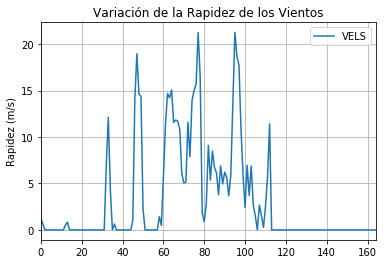

In [11]:
# Gráfica de la rapidez de los vientos (m/s) 
plt.figure(); df.VELS.plot(); plt.legend(loc='best')
plt.title("Variación de la Rapidez de los Vientos")
plt.ylabel("Rapidez (m/s)")
plt.grid(True)
plt.show()

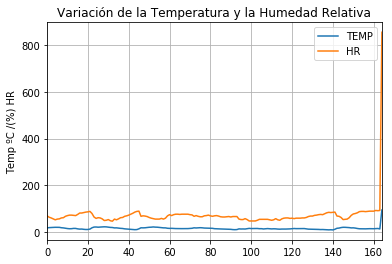

In [12]:
# Gráfica de Temperatura y Humedad Relativa
df1 = df[['TEMP','HR']]
plt.figure(); df1.plot(); plt.legend(loc='best')
plt.title("Variación de la Temperatura y la Humedad Relativa")
plt.ylabel("Temp ºC /(%) HR")
plt.grid(True)
plt.show()


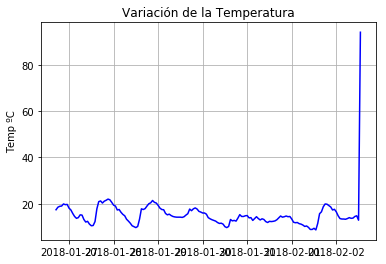

In [13]:
plt.plot_date(x=df.FECHA, y=df.TEMP, fmt="b-")
plt.title("Variación de la Temperatura")
plt.ylabel("Temp ºC")
plt.grid(True)
plt.show()

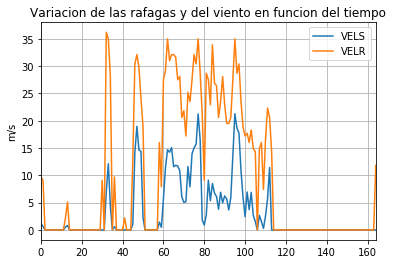

In [14]:
# Gráfica de la variacion de las rafagas y el viento
df1 = df[['VELS','VELR']]
plt.figure(); df1.plot(); plt.legend(loc='best')
plt.title("Variacion de las rafagas y del viento en funcion del tiempo")
plt.ylabel("m/s")
plt.grid(True)
plt.show()

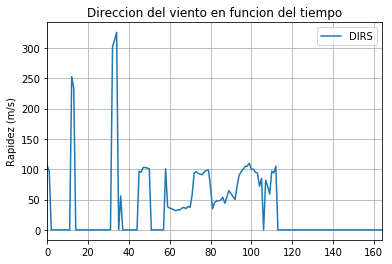

In [15]:
# Gráfica de la direccion de los vientos (m/s) 
plt.figure(); df.DIRS.plot(); plt.legend(loc='best')
plt.title("Direccion del viento en funcion del tiempo")
plt.ylabel("Rapidez (m/s)")
plt.grid(True)
plt.show()

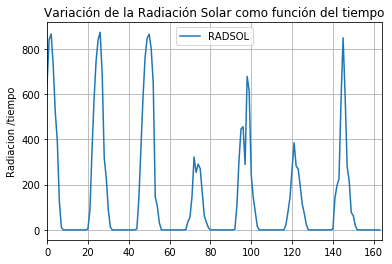

In [16]:
# Gráfica de la Radiación Solar como función del tiempo
plt.figure(); df.RADSOL.plot(); plt.legend(loc='best')
plt.title("Variación de la Radiación Solar como función del tiempo")
plt.ylabel("Radiacion /tiempo")
plt.grid(True)
plt.show()

In [20]:
df.TEMP.min()

8.6999999999999993

In [21]:
df.TEMP.max()

94.0